In [1]:
import pandas as pd
import numpy as np

data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

!wget $data 

### data prep

In [2]:
df = pd.read_csv('data.csv')

In [3]:
# converting irregular column names to proper names

df.columns = df.columns.str.lower().str.replace(" ", "_")

In [4]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [6]:
cols = df.dtypes[df.dtypes == 'object'].index

In [7]:
# lets normalize the columns too

for col in cols:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### EDA

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print('\n')

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48


model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914


year
[2011 2012 2013 1992 1993]
28


engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10


engine_hp
[335. 300. 230. 320. 172.]
356


engine_cylinders
[ 6.  4.  5.  8. 12.]
9


transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5


driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4


number_of_doors
[ 2.  4.  3. nan]
3


market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71


vehicle_size
['compact' 'midsize' 'large']
3


vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16


highway_mpg
[26 28 27 25 24]
59


city_mpg
[19 20 18 17 16]
69


popularity
[3916 3105  819  617 1013]
48


msrp
[46135 40650 

Distribution of price

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
# the above line makes sure the show the graphs in the notebook

<Axes: xlabel='msrp', ylabel='Count'>

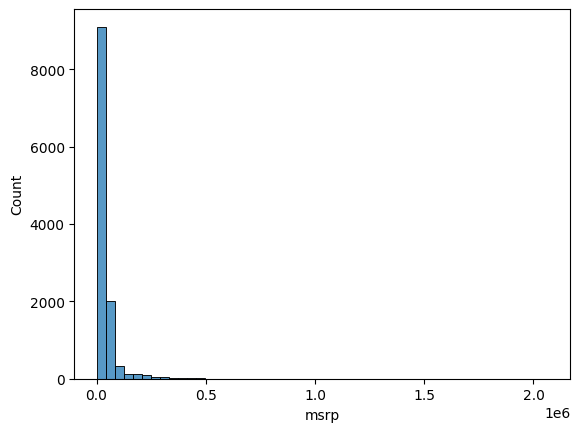

In [11]:
sns.histplot(df.msrp, bins = 50)

# bins here determine how many bars to show
# the below distribution is a long tail, bc most of the values are concerntrated at the left side

<Axes: xlabel='msrp', ylabel='Count'>

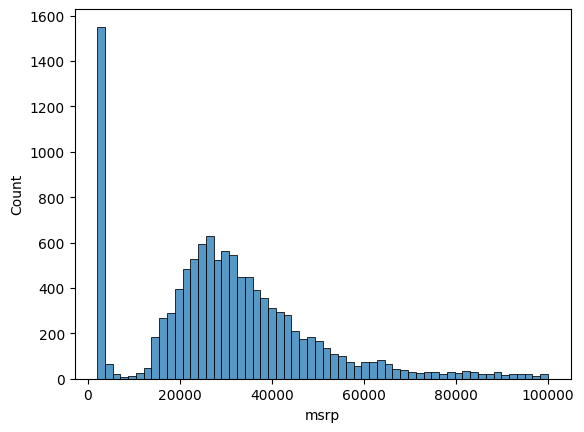

In [12]:
sns.histplot(df.msrp[df.msrp < 100000])

In [13]:
# this kind of data, i.e. long tail data will confuse our model. So we get rid of it by using logarithamic distribution
np.log([1,10,100,1000,100000])

# log of 0 will give errors, so we should use np.log1p that mean 1plus and it adds 1 to all of the vals
np.log1p([0,1,10,100,1000,100000])


array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
       11.51293546])

In [14]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

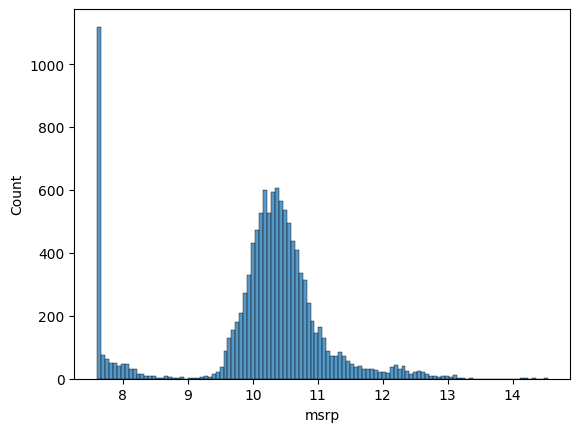

In [15]:
sns.histplot(price_logs)
# now this looks more like a normal dist. This situations is quite good for the models to learn

Missing vals

In [16]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Setup the validation

bascially splitting the dataset into training, validation and testing

In [17]:
int(len(df) * 0.2)

# similar to len(df) * 20 / 100
# i.e. calculating 20%

2382

In [18]:
n = len(df)

n_val = int(len(df) * 0.2)
n_test = int(len(df) * 0.2)
# n_train = int(len(df) * 0.6)
# since we can leave some records out, bc of rounding, which is why we subtract

n_train = n - n_val - n_test

n_train, n_val, n_test

(7150, 2382, 2382)

In [19]:
n, n_val+n_test+n_train

(11914, 11914)

In [20]:
# df.iloc[[1,2,3,4]]
# df.iloc[:5]
# df_train = df.iloc[:n_train]
# df_val = df.iloc[n_train: n_val+n_train]
# df_test = df.iloc[n_val+n_train:]
# now this will return in sequence and we will miss few parts of the data, so we shuffle indexes using numpy


In [21]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [22]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_val+n_train]]
df_test = df.iloc[idx[n_val+n_train:]]

len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [23]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [24]:
# now we remove the unwanted index
df_train = df_train.reset_index(drop= True)
df_val = df_val.reset_index(drop= True)
df_test = df_test.reset_index(drop= True)

df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [25]:
# we have to convert the msrp to log value and convert them to np array
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

len(y_train), len(y_val), len(y_test)

(7150, 2382, 2382)

In [26]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']


In [27]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

### Linear Regression

formula: 
g(xi) = w0 + w1*xi1 + w2*xi2 + ... + wn*xin

In [28]:
# lets assume three features for now. They are: engine_hp, city_mpg, popularity

df_train.iloc[45]

make                                         bmw
model                                         x3
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  240.0
engine_cylinders                             4.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              4.0
market_category                 crossover,luxury
vehicle_size                             midsize
vehicle_style                            4dr_suv
highway_mpg                                   28
city_mpg                                      21
popularity                                  3916
Name: 45, dtype: object

In [29]:
xi = [240, 21, 3916]

In [30]:
# lets assume the weights to be random for now

w0 = 0
w = [0.01, 0.04, 0.001]

In [31]:
def linear_reg(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j]*xi[j]
    return pred

In [32]:
linear_reg(xi)

7.156

In [33]:
# now since we have taken logs we need to reverse it
np.expm1(7.156)

np.float64(1280.7735707483857)

In [34]:
np.log1p(1280.7735707483857)

np.float64(7.156)

### linear regression vector form

In [35]:
# xi = [240, 21, 3916]
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [36]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [37]:
# here are the predictions
def linear_reg(X):
    return X.dot(w_new)

X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [38]:
preds = linear_reg(X)
for i in preds:
    print(np.expm1(i))

237992.82334859075
768348.5101897252
222347.22211010658


### Training a Linear Regression Model

formula:

w = (X^T.X)^-1.X^T.Y

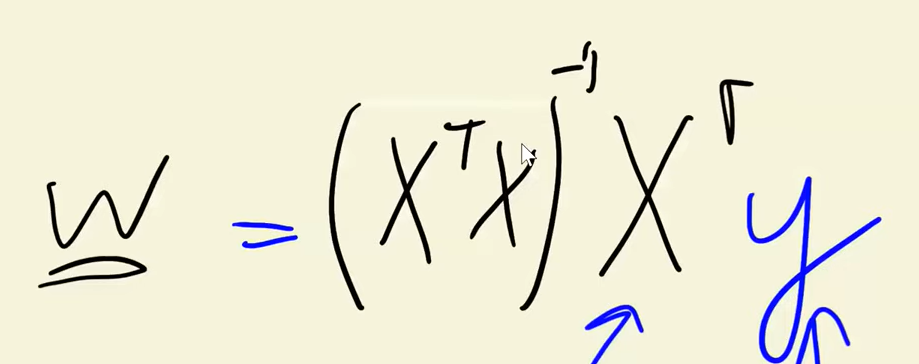

In [39]:
X = [
[148, 24, 1385], 
[132, 25, 2031], 
[453, 11, 86],
[158, 24, 185],
[172, 25, 201],
[413, 11, 86],
[38, 54, 185],
[142, 25, 431],
[453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [40]:
# adding bias i.e. w0 -> this means that if we do not know anything about the car, then this price would be the base

ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [41]:
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [42]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [43]:
XTX = X.T.dot(X)

XTX_inv = np.linalg.inv(XTX)

w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

In [44]:
w0 = w_full[0]
w = w_full[1:]

w0, w

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [45]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [46]:
# train_linear_regression(X,y)

### Car price  baseline model

In [47]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [48]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [49]:
df_train[base].head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657


In [50]:

X_train = df_train[base].values # converting into numpy array
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [51]:
# filling null values

X_train = df_train[base].fillna(0).values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [52]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [53]:
w0, w = train_linear_regression(X_train,y_train)

w0, w

(np.float64(7.927257388069986),
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [54]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

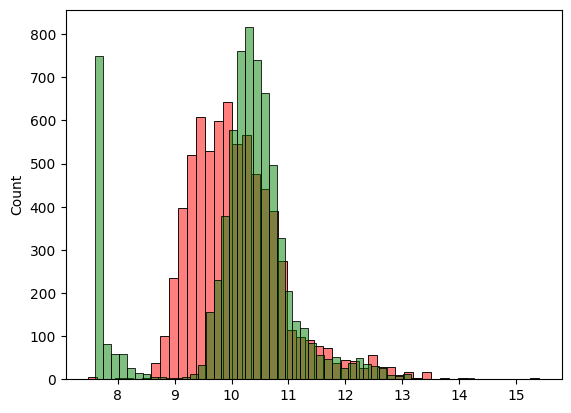

In [55]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'green', alpha = 0.5, bins = 50)

### RMSE (root mean squared error)

used to determine how well the model fits

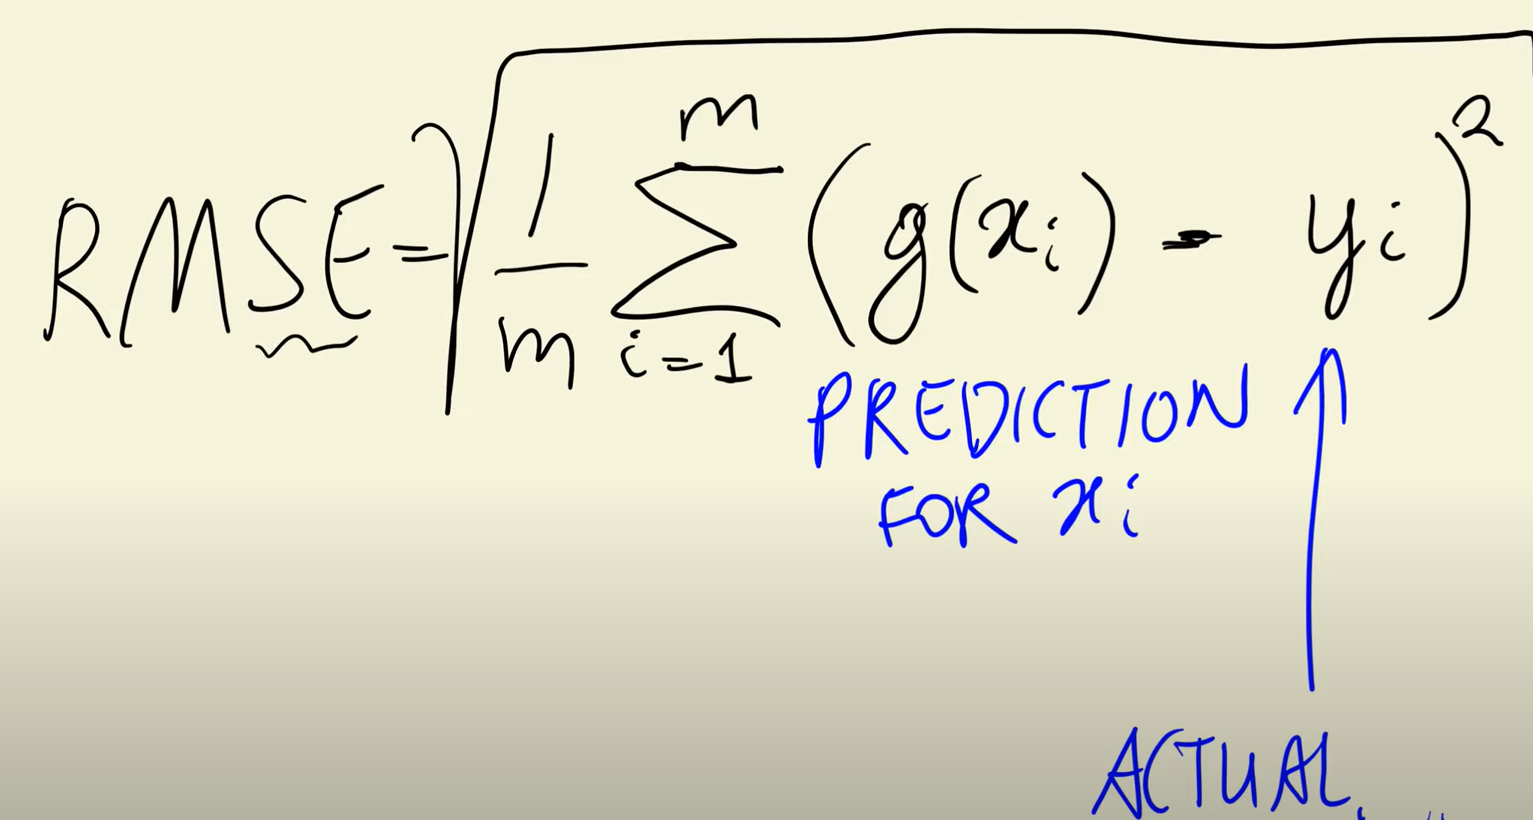

In [56]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)
    

In [57]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

### Validating the model

In [58]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [59]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
# above is the training part, we train using training data, and get the baises

# below is the validating part, we then take these baises and use it on validation data, 
# and calculate the error or fit of the model between the predicted data and the actual values of validation data
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.761653099130156)

### Simple feature engineering

here we check and try to add/remove columns that can help the model to improve

In [60]:
# lets add the year column. but by converting it to age

df_train.year.max()
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [61]:
def prepare_X(df):
    df = df.copy()
    # we make a copy bc we dont want to make changest to the original data
    df['age'] = 2017 - df.year
    features = base+['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [62]:
X_train = prepare_X(df_train)

In [63]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5172055461058299)

<Axes: ylabel='Count'>

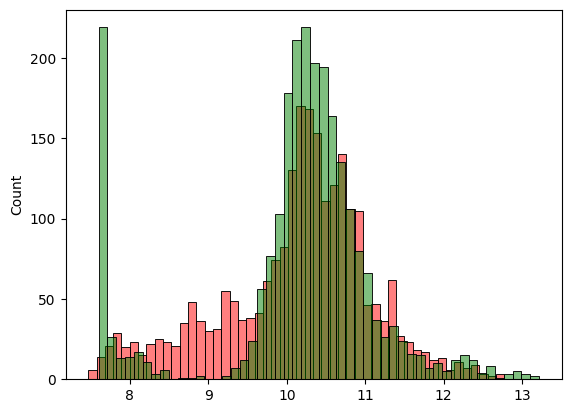

In [64]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_val, color = 'green', alpha = 0.5, bins = 50)

### Categorical variables

In [65]:
def prepare_X(df):
    df = df.copy()
    # we make a copy bc we dont want to make changest to the original data
    df['age'] = 2017 - df.year
    features = base+['age']

    for v in [2,3,4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [67]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]], shape=(7150, 9))

In [68]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.515799564150169)

didn't improve much, so lets include 'make' column

In [69]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [70]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X


In [72]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(53.70370772576197)

the above value is very huge, we wanted to improve but we made it worse

### Regularization

In [74]:
''' 
when the columns of the training matrix are equal, then when taking the inverse of the matrix we get a singular matrix which is why 
it results in error and inverse cannot be calculated

to solve this we usually add a small number to the diagonal of the XTX matrix
'''

In [80]:
XTX = [
    [1, 2, 2],
    [2, 1, 2.00001],
    [1, 2.00002, 1],
]

XTX = np.array(XTX)

In [81]:
np.linalg.inv(XTX)

array([[-1.00000667e+00,  6.66671111e-01,  6.66664445e-01],
       [ 3.33328889e-06, -3.33328889e-01,  6.66654445e-01],
       [ 1.00000000e+00, -6.66657778e-06, -9.99986667e-01]])

In [82]:
'''
we can add by using the identity martix
'''

XTX + 0.01 * np.eye(3)

array([[1.01   , 2.     , 2.     ],
       [2.     , 1.01   , 2.00001],
       [1.     , 2.00002, 1.01   ]])

In [109]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [117]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.46081585855400226)

### Tuning the model

In [118]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 10000]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 120883643437600.25 53.70370772576197
1e-05 8.377536683531915 0.46081532306190714
0.0001 7.139523156766516 0.4608153655817384
0.001 7.1309028247366735 0.46081585855400226
0.1 7.000232409563555 0.4608736549095069
1 6.25074784766319 0.46158128382736374
10 4.729512585705947 0.4726098772668833
100 2.865443147488496 0.595687301375685
10000 0.13681858872362068 1.2701284201990342


In [119]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

np.float64(0.46081585855400226)

### using the model

In [121]:
df_full_train = pd.concat([df_train, df_val])

In [126]:
df_full_train = df_full_train.reset_index(drop = True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [128]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ], shape=(9532,))

In [129]:
X_full_train = prepare_X(df_full_train)

In [132]:
w0, w = train_linear_regression_reg(X_full_train,y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.4600753970082232)

<Axes: ylabel='Count'>

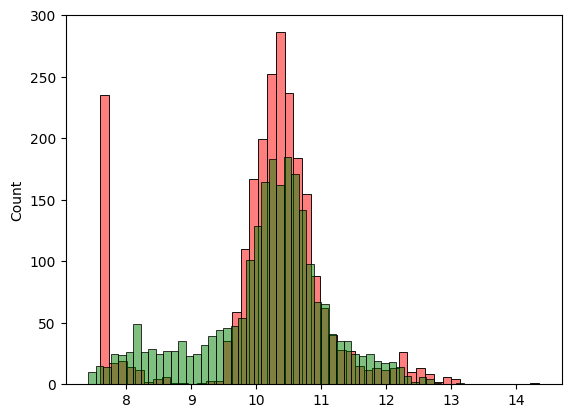

In [133]:
sns.histplot(y_test, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_pred, color = 'green', alpha = 0.5, bins = 50)

In [163]:
car = df_test.iloc[5].to_dict()
car

{'make': 'audi',
 'model': 'a3',
 'year': 2015,
 'engine_fuel_type': 'premium_unleaded_(recommended)',
 'engine_hp': 220.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automated_manual',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 2.0,
 'market_category': 'luxury',
 'vehicle_size': 'compact',
 'vehicle_style': 'convertible',
 'highway_mpg': 32,
 'city_mpg': 23,
 'popularity': 3105}

In [164]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,audi,a3,2015,premium_unleaded_(recommended),220.0,4.0,automated_manual,all_wheel_drive,2.0,luxury,compact,convertible,32,23,3105


In [165]:
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
res = y_pred[0]

In [166]:
np.expm1(res)

np.float64(35402.01710093033)

In [167]:
''' actual cost '''
np.expm1(y_test[5])

np.float64(41149.999999999985)